序列 X1 X2 类别
1 -0.1 -0.2 -1
2 0.5 0.5 1
3 -0.5 0.2 -1
4 -0.2 0.5 -1
5 0.2 0.1 1
6 0.0 0.8 1


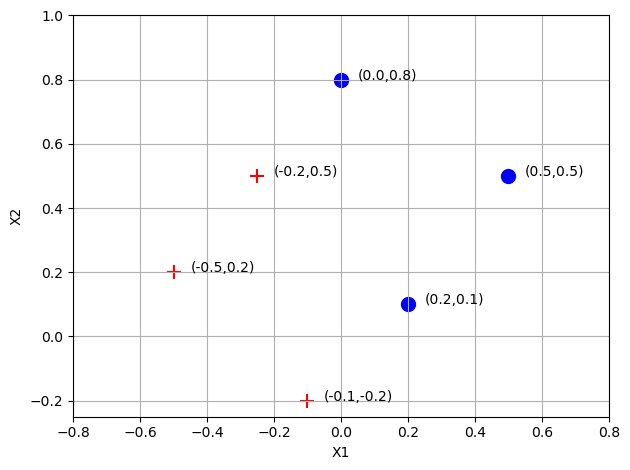

In [2]:
# data import and visualization
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *
xdim = [(-0.1,-0.2), (0.5,0.5), (-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim = [-1,1,-1,-1,1,1]
print("序列", "X1", "X2", "类别")
count = 0
for x,l in zip(xdim, ldim):
    count += 1
    print("%d %3.1f %3.1f %d"%(count, x[0], x[1], l))
    if l > 0:
        marker = 'o'
        color = 'blue'
    else:
        marker = '+'
        color = 'red'
    plt.scatter(x[0], x[1], marker=marker, c=color, s=100)
    plt.text(x[0]+0.05,x[1],'(%3.1f,%3.1f)'%(x[0],x[1]))
plt.axis([-0.8, 0.8,-0.25, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *

def sigmoid(x):
    return 1.0/(1.0 + exp(-x))

# add learning rate compared to the example above

def hebbian(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    w1 = [ww+o*xx for ww,xx in zip(w,x1)]
    return w1

def perceptron(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = 1 if net >= 0 else -1
    w1 = [ww+(d-o)*xx for ww,xx in zip(w,x1)]
    return w1


def delta(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    o1 = o*(1-o)
    w1 = [ww+(d-o)*o1*xx for ww,xx in zip(w,x1)]
    return w1


def widrawhoff(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    w1 = [ww+(d-o)*xx for ww,xx in zip(w,x1)]
    return w1

def correlation(w, x, d, eta):
    x1 = [1, x[0], x[1]]
    w1 = [ww + eta * d * xx for ww, xx in zip(w, x1)]
    return w1

In [6]:
from typing import Callable, List

def update_weights(
    weights: List[float], 
    inputs: List[float], 
    desired_outputs: List[float], 
    update_function: Callable[[List[float], float, float, float], List[float]], 
    epochs: int = 2, 
    learning_rate: float = 0.5
) -> List[float]:
    """
    Updates the weights using the provided update function over a specified number of epochs.

    Args:
        weights (List[float]): The initial weights to be updated.
        inputs (List[float]): The input values for the update process.
        desired_outputs (List[float]): The desired output values for the update process.
        update_function (Callable): A function that updates the weights based on inputs and desired outputs.
        epochs (int, optional): The number of epochs to run the update process. Default is 2.
        learning_rate (float, optional): The learning rate for the update process. Default is 0.5.

    Returns:
        List[float]: The updated weights after the specified number of epochs.
    """
    for _ in range(epochs):
        for input_value, desired_output in zip(inputs, desired_outputs):
            weights = update_function(weights, input_value, desired_output, learning_rate)
    
    print(f"{update_function.__name__}: {[f'{weight:.6f}' for weight in weights]}")
    return weights

In [8]:
import matplotlib.pyplot as plt
from typing import List, Tuple

def visualize(results: List[Tuple[int, float, float]]) -> None:
    """
    Visualizes the results of weight coefficients using a scatter plot.
    
    Args:
    results (list of tuples): Each tuple contains an index and two float values (w1, w2).
    
    Returns:
    None: This function displays a plot and does not return any value.
    """
    plt.figure(figsize=(10, 8))
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    func = ["hebbian", "perceptron", "delta", "widrowhoff", "correlation"]
    
    for wb, func_name in zip(results, func):
        color = colors[int(wb[0]) % len(colors)]
        plt.scatter(wb[1], wb[2], c=color, label=func_name)
        plt.text(wb[1], wb[2], f'({wb[1]:.4f}, {wb[2]:.4f})\n{func_name}', fontsize=9, color=color)
    
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title('Final Weight Coefficients after 2 Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
rr=[]
wb=[0,0,0]
func=[hebbian,perceptron,delta,widrawhoff,correlation]
for i in func:
    rr.append(update_weights(wb,xdim,ldim,i))

hebbian: ['9.737760', '-0.251759', '3.298841']
perceptron: ['0.000000', '2.100000', '0.600000']
delta: ['-1.186372', '0.772731', '0.084544']
widrawhoff: ['-2.936807', '3.170164', '1.038280']
correlation: ['0.000000', '1.550000', '0.900000']


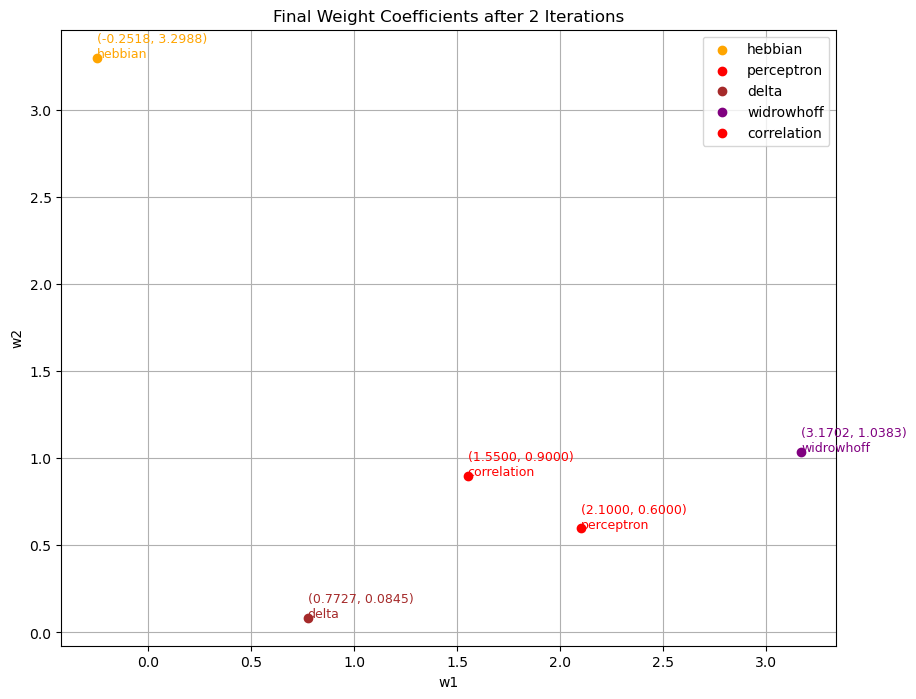

In [12]:
visualize(rr)

Hebbian和Correlation算法：由于是无监督的，它们倾向于产生较大的权重更新，以捕捉输入数据的统计特性。<br>
感知器算法：由于其只在分类错误时更新权重，因此更新通常较为显著，但仅针对边界附近的样本。<br>
Delta和Widrow-Hoff LMS算法：这两种算法都是有监督的，并且基于梯度下降，因此它们的权重更新通常更为温和且均匀。<br>